###Imports###


In [292]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

###Data gathering###

In [293]:
sz_1 = pd.read_csv("https://raw.githubusercontent.com/CliffordTheBigRedCoder/CNNP/main/Seizures/sz_1.csv", header = None)
sz_2 = pd.read_csv("https://raw.githubusercontent.com/CliffordTheBigRedCoder/CNNP/main/Seizures/sz_2.csv", header = None)
sz_3 = pd.read_csv("https://raw.githubusercontent.com/CliffordTheBigRedCoder/CNNP/main/Seizures/sz_3.csv", header = None)
sz_4 = pd.read_csv("https://raw.githubusercontent.com/CliffordTheBigRedCoder/CNNP/main/Seizures/sz_4.csv", header = None)
sz_5 = pd.read_csv("https://raw.githubusercontent.com/CliffordTheBigRedCoder/CNNP/main/Seizures/sz_5.csv", header = None)
sz_6 = pd.read_csv("https://raw.githubusercontent.com/CliffordTheBigRedCoder/CNNP/main/Seizures/sz_6.csv", header = None)
sz_7 = pd.read_csv("https://raw.githubusercontent.com/CliffordTheBigRedCoder/CNNP/main/Seizures/sz_7.csv", header = None)
sz_8 = pd.read_csv("https://raw.githubusercontent.com/CliffordTheBigRedCoder/CNNP/main/Seizures/sz_8.csv", header = None)
sz_9 = pd.read_csv("https://raw.githubusercontent.com/CliffordTheBigRedCoder/CNNP/main/Seizures/sz_9.csv", header = None)
sz_10 = pd.read_csv("https://raw.githubusercontent.com/CliffordTheBigRedCoder/CNNP/main/Seizures/sz_10.csv", header = None)
sz_11 = pd.read_csv("https://raw.githubusercontent.com/CliffordTheBigRedCoder/CNNP/main/Seizures/sz_11.csv", header = None)
sz_timings = pd.read_csv("https://raw.githubusercontent.com/CliffordTheBigRedCoder/CNNP/main/Seizures/sz_timing.csv", header = None)

###Early Data analysis###

In [294]:
print("rows in sz_1:", len(sz_1.index))
print("columns in sz_1:", len(sz_1.columns))

rows in sz_1: 29
columns in sz_1: 38656


In [295]:
sz_1_pre = sz_1.iloc[:,:15360] #15360 is 120 seconds at 128 polls per second
sz_1_post = sz_1.iloc[:,15360:] #note the seizure isn't present for this entire period "post" is also being used to refer to post the starting point of the seizure
print("columns in sz_1_pre:", len(sz_1_pre.columns))
print("columns in sz_1_post:", len(sz_1_post.columns))

columns in sz_1_pre: 15360
columns in sz_1_post: 23296


In [296]:
print("standard deviation of entire pre data: \n", sz_1_pre.std(axis = 1))
print("standard deviation of entire post data: \n", sz_1_post.std(axis = 1))

standard deviation of entire pre data: 
 0      61.593456
1     137.514718
2      46.077710
3     134.772011
4     136.737482
5      66.224626
6     100.589774
7      59.729648
8      71.617643
9      68.188918
10    114.398115
11     81.291758
12     70.488319
13     64.253314
14     89.214046
15     71.668331
16     56.692954
17     31.881829
18     62.051294
19     53.034930
20     32.737765
21     85.064434
22     46.375220
23     37.731291
24     84.657897
25    101.571742
26    101.968577
27    123.210956
28    116.222738
dtype: float64
standard deviation of entire post data: 
 0      65.233402
1     143.677256
2      50.710175
3     154.573881
4     148.859456
5      66.225333
6     123.373435
7      95.258319
8      94.692338
9      72.513741
10    107.892329
11    109.495868
12    165.289387
13     75.469086
14     98.642488
15     76.026063
16    114.931399
17     37.308647
18     72.571645
19     67.222890
20     39.764819
21     95.281107
22     47.888178
23     44.098579
2

###Specific standard deviation analysis###

In [297]:
#Code to find the standard deviation over a second for each second in a dataframe given a second is 128 columns
def std_second(sz):
  std = []
  for i in range(0, len(sz.index)):
    row_std = []
    for x in range(0, len(sz.columns)//128):
      start = x*128
      temp_std = sz.iloc[[i],start:start+128].std(axis=1)
      row_std.append(temp_std.iloc[0])
    std.append(row_std)
  return(std)

In [298]:
sz_1_pre_std = std_second(sz_1_pre)
sz_1_post_std = std_second(sz_1_post)

In [299]:
print("90th percentile standard deviation in metric 0 pre seizure is:",np.percentile(sz_1_pre_std[0],90))
print("90th percentile standard deviation in metric 0 post seizure is:",np.percentile(sz_1_post_std[0],90))

90th percentile standard deviation in metric 0 pre seizure is: 85.03997836194512
90th percentile standard deviation in metric 0 post seizure is: 89.8488590588509


In [300]:
#Finds outliers / channels involved in the seizure assuming if the 90th percentile 
#of the post/during seizure standard deviation is higher than the highest pre-seizure distribution it is involved
def std_outliers(std_pre, std_post):
  if len(std_pre) != len(std_post):
    print("Error differing amount of rows in pre/post")
  outliers = []
  for i in range(0,len(std_pre)):
    #if max(std_post[i]) > np.percentile(sz_1_pre_std[i],90):
      #outliers.append(i)
    if max(std_pre[i]) < np.percentile(sz_1_post_std[i],90):
      outliers.append(i)
  return outliers

In [301]:
sz_1_outliers = std_outliers(sz_1_pre_std, sz_1_post_std)
print("The involved channels in seizure 1 are:",sz_1_outliers)

The involved channels in seizure 1 are: [7, 11, 12, 16]


In [302]:
sz_1_pre_max = []
sz_1_post_percentile = []
for i in range(0,len(sz_1_pre_std)):
  sz_1_pre_max.append(max(sz_1_pre_std[i]))
  sz_1_post_percentile.append(np.percentile(sz_1_post_std[i],90))
  print("Metric",i, "\nPre-seizure max std:",max(sz_1_pre_std[i]),"\nPost-seizure 90th percentile std:",np.percentile(sz_1_post_std[i],90))

Metric 0 
Pre-seizure max std: 126.49053712147156 
Post-seizure 90th percentile std: 89.8488590588509
Metric 1 
Pre-seizure max std: 243.92726685600053 
Post-seizure 90th percentile std: 197.6274164833844
Metric 2 
Pre-seizure max std: 95.6396388882669 
Post-seizure 90th percentile std: 73.42659357998593
Metric 3 
Pre-seizure max std: 306.1224499328889 
Post-seizure 90th percentile std: 201.24827986872188
Metric 4 
Pre-seizure max std: 223.238918982078 
Post-seizure 90th percentile std: 197.3412895150202
Metric 5 
Pre-seizure max std: 144.90792757510698 
Post-seizure 90th percentile std: 91.23529948086683
Metric 6 
Pre-seizure max std: 197.38273316226386 
Post-seizure 90th percentile std: 171.5846650971869
Metric 7 
Pre-seizure max std: 118.02152351940582 
Post-seizure 90th percentile std: 131.45818783667153
Metric 8 
Pre-seizure max std: 134.4492000046943 
Post-seizure 90th percentile std: 119.79097418578476
Metric 9 
Pre-seizure max std: 113.9070451315923 
Post-seizure 90th percentil

###Performing same operations for the other seizures###

In [303]:
sz_2_pre = sz_2.iloc[:,:15360]
sz_2_post = sz_2.iloc[:,15360:]
sz_3_pre = sz_3.iloc[:,:15360]
sz_3_post = sz_3.iloc[:,15360:]
sz_4_pre = sz_4.iloc[:,:15360]
sz_4_post = sz_4.iloc[:,15360:]
sz_5_pre = sz_5.iloc[:,:15360]
sz_5_post = sz_5.iloc[:,15360:]
sz_6_pre = sz_6.iloc[:,:15360]
sz_6_post = sz_6.iloc[:,15360:]
sz_7_pre = sz_7.iloc[:,:15360]
sz_7_post = sz_7.iloc[:,15360:]
sz_8_pre = sz_8.iloc[:,:15360]
sz_8_post = sz_8.iloc[:,15360:]
sz_9_pre = sz_9.iloc[:,:15360]
sz_9_post = sz_9.iloc[:,15360:]
sz_10_pre = sz_10.iloc[:,:15360]
sz_10_post = sz_10.iloc[:,15360:]
sz_11_pre = sz_11.iloc[:,:15360]
sz_11_post = sz_11.iloc[:,15360:]

In [304]:
sz_2_pre_std = std_second(sz_2_pre)
sz_2_post_std = std_second(sz_2_post)
sz_3_pre_std = std_second(sz_3_pre)
sz_3_post_std = std_second(sz_3_post)
sz_4_pre_std = std_second(sz_4_pre)
sz_4_post_std = std_second(sz_4_post)
sz_5_pre_std = std_second(sz_5_pre)
sz_5_post_std = std_second(sz_5_post)
sz_6_pre_std = std_second(sz_6_pre)
sz_6_post_std = std_second(sz_6_post)
sz_7_pre_std = std_second(sz_7_pre)
sz_7_post_std = std_second(sz_7_post)
sz_8_pre_std = std_second(sz_8_pre)
sz_8_post_std = std_second(sz_8_post)
sz_9_pre_std = std_second(sz_9_pre)
sz_9_post_std = std_second(sz_9_post)
sz_10_pre_std = std_second(sz_10_pre)
sz_10_post_std = std_second(sz_10_post)
sz_11_pre_std = std_second(sz_11_pre)
sz_11_post_std = std_second(sz_11_post)

In [305]:
sz_2_outliers = std_outliers(sz_2_pre_std, sz_2_post_std)
sz_3_outliers = std_outliers(sz_3_pre_std, sz_3_post_std)
sz_4_outliers = std_outliers(sz_4_pre_std, sz_4_post_std)
sz_5_outliers = std_outliers(sz_5_pre_std, sz_5_post_std)
sz_6_outliers = std_outliers(sz_6_pre_std, sz_6_post_std)
sz_7_outliers = std_outliers(sz_7_pre_std, sz_7_post_std)
sz_8_outliers = std_outliers(sz_8_pre_std, sz_8_post_std)
sz_9_outliers = std_outliers(sz_9_pre_std, sz_9_post_std)
sz_10_outliers = std_outliers(sz_10_pre_std, sz_10_post_std)
sz_11_outliers = std_outliers(sz_11_pre_std, sz_11_post_std)

In [306]:
all_outliers = [sz_1_outliers, sz_2_outliers, sz_3_outliers, sz_4_outliers, 
                sz_5_outliers, sz_6_outliers, sz_7_outliers, sz_8_outliers, 
                sz_9_outliers, sz_10_outliers, sz_11_outliers]

In [307]:
all_outlier_count = []
for i in all_outliers:
  all_outlier_count.append(len(i))

In [308]:
a = [0]
total_involvement = a*29
for i in all_outliers:
  for x in range(0,len(b)):
    if x in i:
      total_involvement[x]+=1

for i in range(0,len(total_involvement)):
  if total_involvement[i] == 11:
    print("Channel",i,"has full involvement")

Channel 7 has full involvement
Channel 11 has full involvement
Channel 12 has full involvement
Channel 16 has full involvement


###Visualising the Data###

In [309]:
sz_timings[0] = pd.to_datetime(sz_timings[0])
sz_timings[0] = sz_timings[0].dt.strftime("%b %d %H:%M")

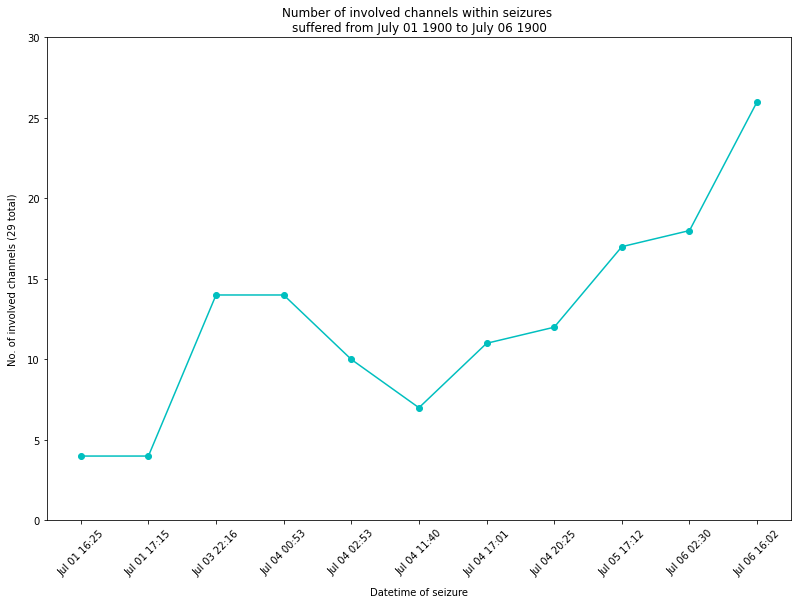

In [310]:
px = 1/plt.rcParams['figure.dpi']
fig = plt.figure(figsize=(960*px, 640*px))
plt.plot(sz_timings[0], all_outlier_count, "co-")
plt.ylabel("No. of involved channels (29 total)", labelpad=10)
plt.xlabel("Datetime of seizure", labelpad=10)
plt.xticks(rotation=45)
plt.ylim(0,30)
plt.title("Number of involved channels within seizures "+
          "\nsuffered from July 01 1900 to July 06 1900")
plt.savefig("Number of involved channels within seizures "+
            "suffered from July 01 1900 to July 06 1900")
plt.show()

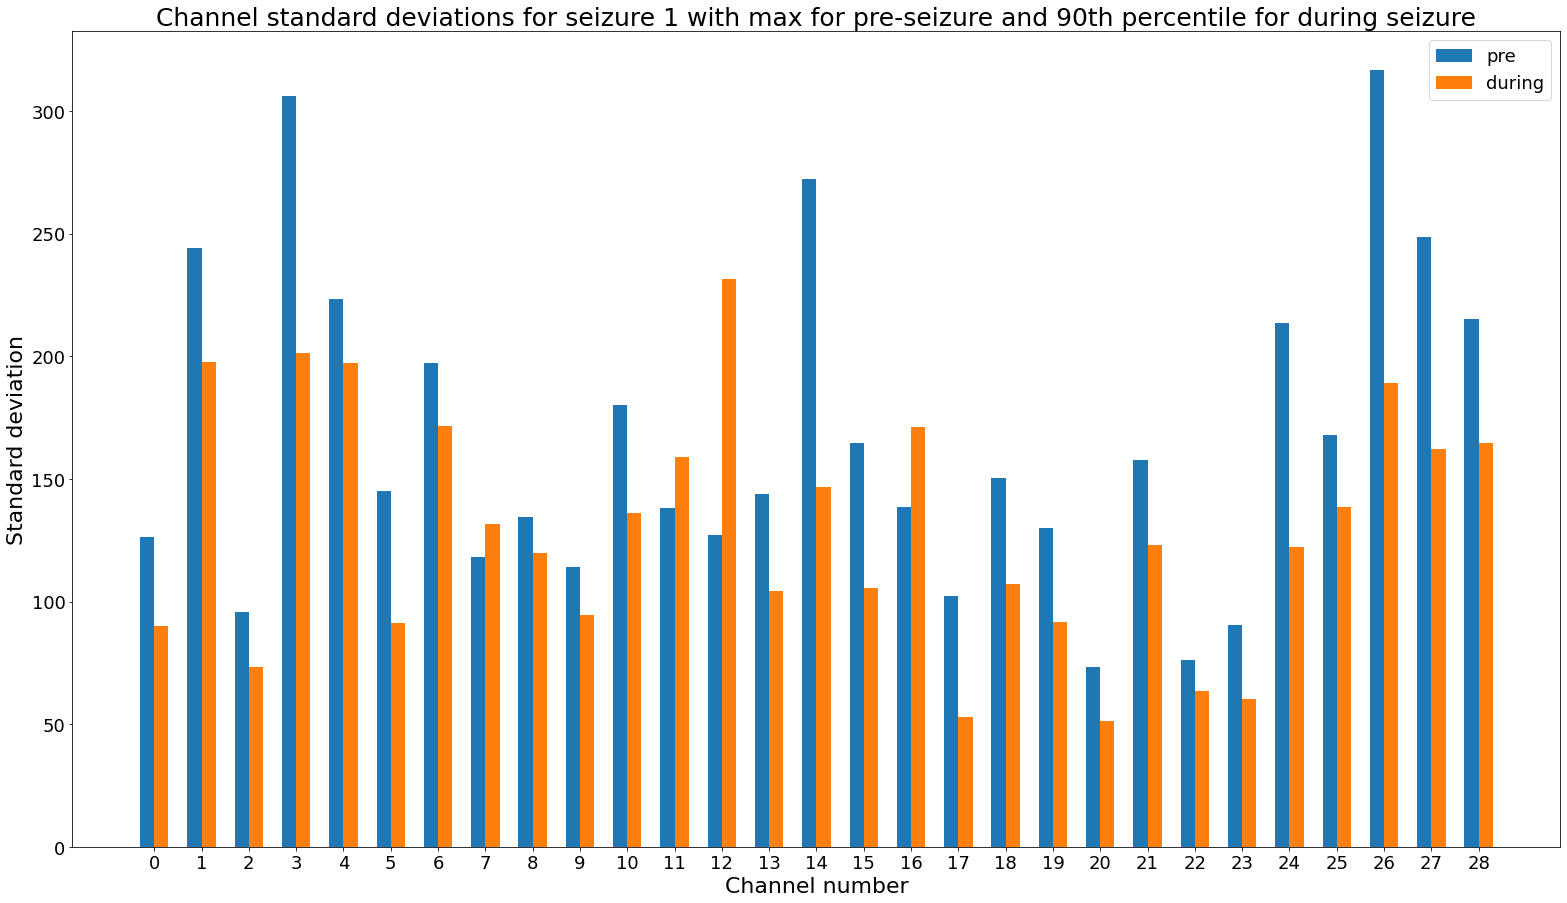

In [311]:
px = 1/plt.rcParams['figure.dpi']
fig, ax = plt.subplots(figsize=(1920*px, 1080*px))
index = np.arange(29)
bar_width = 0.3
pre = ax.bar(index, sz_1_pre_max, bar_width, label = "pre")
post = ax.bar(index+bar_width, sz_1_post_percentile, bar_width, label = "during")
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(index, fontsize = 18)
ax.set_yticklabels([0,50,100,150,200,250,300,350],fontsize = 18)
ax.set_xlabel("Channel number", fontsize = 22)
ax.set_ylabel("Standard deviation", fontsize = 22)
ax.legend(fontsize = 18)
plt.title("Channel standard deviations for seizure 1 with max for pre-seizure and 90th percentile for during seizure", fontsize = 25)
plt.savefig("Channel standard deviations for seizure 1 with max for pre-seizure and 90th percentile for during seizure")
plt.show()